In [ ]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")

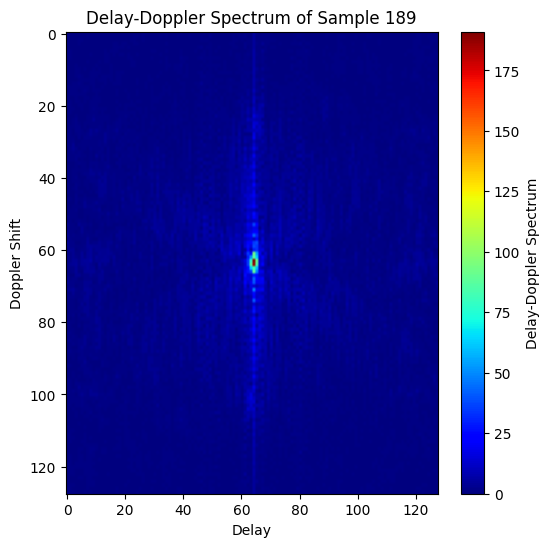

Playing audio for Sample 6102603Z_seg1 (Sampling Rate: 80000 Hz)


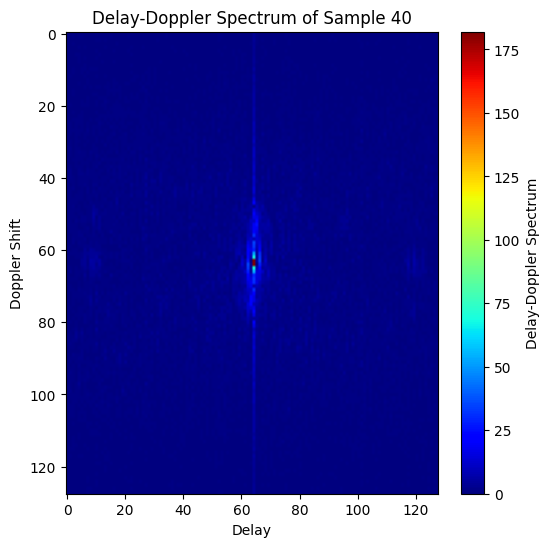

Playing audio for Sample 61026002_seg1 (Sampling Rate: 80000 Hz)


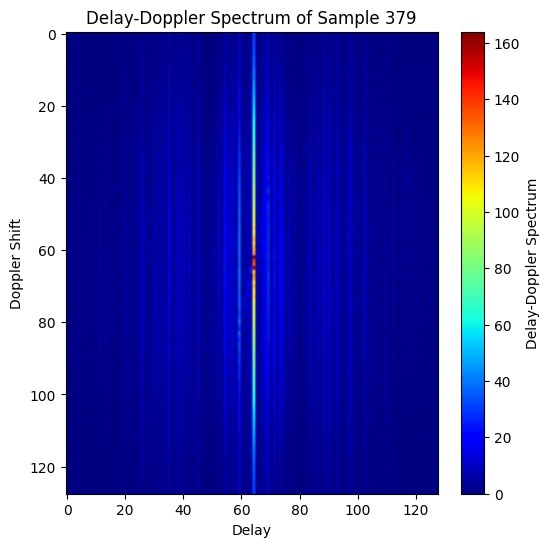

Playing audio for Sample 59037013_seg5 (Sampling Rate: 60600 Hz)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import cv2  # 用于调整图像尺寸
import random
from IPython.display import Audio

# 读取数据
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")  # 训练集采样率
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")  # 测试集采样率

# 选取3个随机样本
random_indices = random.sample(range(X_train.shape[0]), 3)
selected_signals = X_train[random_indices, :]
selected_ids = ids_train[random_indices]
selected_srs = sr_train[random_indices]  # 获取对应的采样率

# 遍历所选样本并计算 MFCC
for i, (signal, sample_rate) in enumerate(zip(selected_signals, selected_srs)):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算 MFCC（使用当前样本的采样率）
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40)  # 40 维 MFCC
    mfcc = librosa.power_to_db(mfcc, ref=np.max)  # 转换为 dB 形式

    # 归一化到 [0,255]
    mfcc_min, mfcc_max = np.min(mfcc), np.max(mfcc)
    mfcc_img = (mfcc - mfcc_min) / (mfcc_max - mfcc_min)  # 归一化到 [0,1]
    mfcc_resized = cv2.resize((mfcc_img * 255).astype(np.uint8), (128, 128), interpolation=cv2.INTER_CUBIC)

    # 绘图
    plt.figure(figsize=(6, 6))
    plt.imshow(mfcc_resized, aspect='auto', cmap='jet')
    plt.colorbar(label='MFCC Coefficients')
    plt.ylabel("MFCC Coefficients")
    plt.xlabel("Time (scaled)")
    plt.title(f"MFCC of Sample {random_indices[i]}")
    plt.show()

    # 播放音频（使用正确的采样率）
    print(f"Playing audio for Sample {selected_ids[i]} (Sampling Rate: {sample_rate} Hz)")
    display(Audio(signal, rate=sample_rate))
